### Import Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")


### Defining the list of header names for the data

In [2]:
headers = ["f" + str(i) for i in range(1025)]
headers[1024] = "symbol"

### Reading in the training and test data 1 

In [3]:
training_data = pd.read_csv("data-sets/train_1.csv", sep=",", header=0, names=headers)
testing_data = pd.read_csv("data-sets/test_with_label_1.csv", sep=",", header=0, names=headers)

### Plot the distribution of the training 

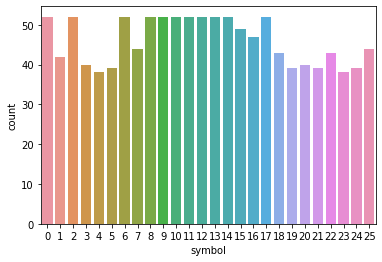

In [15]:
sns.countplot(training_data["symbol"])
plt.savefig("results/training1-dist.png")
plt.show()

### Setting up the training/testing features and targets using out imported data

In [4]:
X_training_features = training_data.drop("symbol", axis=1)
y_training_targets = training_data["symbol"]

In [5]:
X_testing_features = testing_data.drop("symbol", axis=1)
y_testing_targets = testing_data["symbol"]

## Define the grid

In [6]:
param_grid=[
    { 'activation': ['logistic','tanh','relu','identity'], 'hidden_layer_sizes':[(30,50),(10,10,10)], 'solver':['adam','sgd']}
]

### Training the Base-MLP model and Predicting with test set 

In [7]:
mlp = MLPClassifier()
clf = GridSearchCV(mlp, param_grid, verbose=2).fit(X_training_features, y_training_targets)
print("print best parameter")
print(clf.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] activation=logistic, hidden_layer_sizes=(30, 50), solver=adam ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation=logistic, hidden_layer_sizes=(30, 50), solver=adam, total=   3.5s
[CV] activation=logistic, hidden_layer_sizes=(30, 50), solver=adam ...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV]  activation=logistic, hidden_layer_sizes=(30, 50), solver=adam, total=   3.3s
[CV] activation=logistic, hidden_layer_sizes=(30, 50), solver=adam ...
[CV]  activation=logistic, hidden_layer_sizes=(30, 50), solver=adam, total=   3.5s
[CV] activation=logistic, hidden_layer_sizes=(30, 50), solver=adam ...
[CV]  activation=logistic, hidden_layer_sizes=(30, 50), solver=adam, total=   3.4s
[CV] activation=logistic, hidden_layer_sizes=(30, 50), solver=adam ...
[CV]  activation=logistic, hidden_layer_sizes=(30, 50), solver=adam, total=   3.4s
[CV] activation=logistic, hidden_layer_sizes=(30, 50), solver=sgd ....
[CV]  activation=logistic, hidden_layer_sizes=(30, 50), solver=sgd, total=   1.4s
[CV] activation=logistic, hidden_layer_sizes=(30, 50), solver=sgd ....
[CV]  activation=logistic, hidden_layer_sizes=(30, 50), solver=sgd, total=   1.5s
[CV] activation=logistic, hidden_layer_sizes=(30, 50), solver=sgd ....
[CV]  activation=logistic, hidden_layer_sizes=(30, 50), solver=sgd, total=   1

[CV]  activation=relu, hidden_layer_sizes=(10, 10, 10), solver=sgd, total=   2.7s
[CV] activation=relu, hidden_layer_sizes=(10, 10, 10), solver=sgd ....
[CV]  activation=relu, hidden_layer_sizes=(10, 10, 10), solver=sgd, total=   2.7s
[CV] activation=relu, hidden_layer_sizes=(10, 10, 10), solver=sgd ....
[CV]  activation=relu, hidden_layer_sizes=(10, 10, 10), solver=sgd, total=   2.8s
[CV] activation=relu, hidden_layer_sizes=(10, 10, 10), solver=sgd ....
[CV]  activation=relu, hidden_layer_sizes=(10, 10, 10), solver=sgd, total=   3.4s
[CV] activation=relu, hidden_layer_sizes=(10, 10, 10), solver=sgd ....
[CV]  activation=relu, hidden_layer_sizes=(10, 10, 10), solver=sgd, total=   2.9s
[CV] activation=identity, hidden_layer_sizes=(30, 50), solver=adam ...
[CV]  activation=identity, hidden_layer_sizes=(30, 50), solver=adam, total=   3.0s
[CV] activation=identity, hidden_layer_sizes=(30, 50), solver=adam ...
[CV]  activation=identity, hidden_layer_sizes=(30, 50), solver=adam, total=   3.2

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  4.1min finished


print best parameter
{'activation': 'identity', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


In [8]:
pred_best_MLP = clf.predict(X_testing_features)



### Output the performance into the csv result file

In [9]:
# The csv filename 
best_MLP_results_filename ='./results/best-MLP/Best_MLP-DS1.csv'

# The results (Predictions)
best_MLP_results = np.arange(1, pred_best_MLP.shape[0])


# The confusion matrix
best_MLP_confusion_matrix = confusion_matrix(y_testing_targets, pred_best_MLP)
best_MLP_confusion_matrix_data_frame = pd.DataFrame(best_MLP_confusion_matrix).transpose()

# The classification report (accuracy, f1-score, etc...)
best_MLP_classification_report = classification_report(y_testing_targets, pred_best_MLP, output_dict=True)
best_MLP_classification_data_frame = pd.DataFrame(best_MLP_classification_report).transpose()

# Write each result [row,prediction] to the CSV file
# This will also create a new file
with open(best_MLP_results_filename, "w", newline="") as file:
    writer = csv.writer(file)    
    writer.writerow(["(a) Predicted Results:"])
    writer.writerow("")
    for i in zip(best_MLP_results, pred_best_MLP):
        writer.writerow([i])
        
# Append the confusion matrix to the CSV
with open(best_MLP_results_filename, "a", newline="") as file:
    writer = csv.writer(file)    
    writer.writerow("")
    writer.writerow(["(b) Confusion Matrix:"])
    writer.writerow("")
best_MLP_confusion_matrix_data_frame.to_csv(best_MLP_results_filename, mode="a")    
        
# Append the classification report to the CSV
with open(best_MLP_results_filename, "a", newline="") as file:
    writer = csv.writer(file)    
    writer.writerow("")
    writer.writerow(["(c) & (d) Performance Metrics:"])
    writer.writerow("")
best_MLP_classification_data_frame.to_csv(best_MLP_results_filename, mode="a")

### Display classificationmetrics and confusion matrix

In [10]:
print(classification_report(y_testing_targets, pred_best_MLP))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       1.00      0.50      0.67         2
           6       0.67      1.00      0.80         4
           7       0.50      0.67      0.57         3
           8       0.75      1.00      0.86         3
           9       0.67      0.50      0.57         4
          10       0.50      0.33      0.40         3
          11       1.00      1.00      1.00         4
          12       0.33      0.33      0.33         3
          13       1.00      0.75      0.86         4
          14       1.00      1.00      1.00         3
          15       0.67      0.67      0.67         3
          16       1.00      1.00      1.00         3
          17       0.75    

In [11]:
print(best_MLP_confusion_matrix)

[[2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 

### Reading in the training and test data 2

In [12]:
training_data = pd.read_csv("data-sets/train_2.csv", sep=",", header=0, names=headers)
testing_data = pd.read_csv("data-sets/test_with_label_2.csv", sep=",", header=0, names=headers)

### Plot the distribution of the training and test data

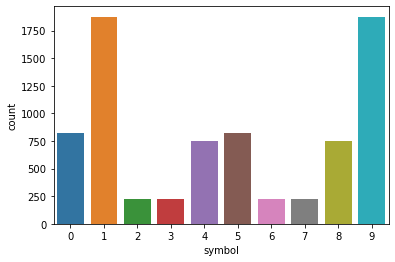

In [6]:
sns.countplot(training_data["symbol"])
plt.savefig("results/training2-dist.png")
plt.show()

### Setup the training/testing features and targets using our imported data

In [13]:
X_training_features = training_data.drop("symbol", axis=1)
y_training_targets = training_data["symbol"]
X_testing_features = testing_data.drop("symbol", axis=1)
y_testing_targets = testing_data["symbol"]

In [14]:
mlp = MLPClassifier()
clf = GridSearchCV(mlp, param_grid, verbose=2).fit(X_training_features, y_training_targets)
print("print best parameter")
print(clf.best_params_)
pred_best_MLP = clf.predict(X_testing_features)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] activation=logistic, hidden_layer_sizes=(30, 50), solver=adam ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation=logistic, hidden_layer_sizes=(30, 50), solver=adam, total=  30.3s
[CV] activation=logistic, hidden_layer_sizes=(30, 50), solver=adam ...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   30.3s remaining:    0.0s


[CV]  activation=logistic, hidden_layer_sizes=(30, 50), solver=adam, total=  26.4s
[CV] activation=logistic, hidden_layer_sizes=(30, 50), solver=adam ...
[CV]  activation=logistic, hidden_layer_sizes=(30, 50), solver=adam, total=  27.4s
[CV] activation=logistic, hidden_layer_sizes=(30, 50), solver=adam ...
[CV]  activation=logistic, hidden_layer_sizes=(30, 50), solver=adam, total=  26.8s
[CV] activation=logistic, hidden_layer_sizes=(30, 50), solver=adam ...
[CV]  activation=logistic, hidden_layer_sizes=(30, 50), solver=adam, total=  26.1s
[CV] activation=logistic, hidden_layer_sizes=(30, 50), solver=sgd ....
[CV]  activation=logistic, hidden_layer_sizes=(30, 50), solver=sgd, total=  25.3s
[CV] activation=logistic, hidden_layer_sizes=(30, 50), solver=sgd ....
[CV]  activation=logistic, hidden_layer_sizes=(30, 50), solver=sgd, total=  27.1s
[CV] activation=logistic, hidden_layer_sizes=(30, 50), solver=sgd ....
[CV]  activation=logistic, hidden_layer_sizes=(30, 50), solver=sgd, total=  26

[CV]  activation=relu, hidden_layer_sizes=(10, 10, 10), solver=sgd, total=  22.5s
[CV] activation=relu, hidden_layer_sizes=(10, 10, 10), solver=sgd ....
[CV]  activation=relu, hidden_layer_sizes=(10, 10, 10), solver=sgd, total=  22.7s
[CV] activation=relu, hidden_layer_sizes=(10, 10, 10), solver=sgd ....
[CV]  activation=relu, hidden_layer_sizes=(10, 10, 10), solver=sgd, total=  22.8s
[CV] activation=relu, hidden_layer_sizes=(10, 10, 10), solver=sgd ....
[CV]  activation=relu, hidden_layer_sizes=(10, 10, 10), solver=sgd, total=  22.4s
[CV] activation=relu, hidden_layer_sizes=(10, 10, 10), solver=sgd ....
[CV]  activation=relu, hidden_layer_sizes=(10, 10, 10), solver=sgd, total=  22.1s
[CV] activation=identity, hidden_layer_sizes=(30, 50), solver=adam ...
[CV]  activation=identity, hidden_layer_sizes=(30, 50), solver=adam, total=  19.2s
[CV] activation=identity, hidden_layer_sizes=(30, 50), solver=adam ...
[CV]  activation=identity, hidden_layer_sizes=(30, 50), solver=adam, total=  21.1

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 30.0min finished


print best parameter
{'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'sgd'}


### Output the performance into the csv result file

In [16]:
# The csv filename 
best_MLP_results_filename ='./results/best-MLP/Best_MLP-DS2.csv'
# The results (Predictions)
best_MLP_results = np.arange(1, pred_best_MLP.shape[0])


# The confusion matrix
best_MLP_confusion_matrix = confusion_matrix(y_testing_targets, pred_best_MLP)
best_MLP_confusion_matrix_data_frame = pd.DataFrame(best_MLP_confusion_matrix).transpose()

# The classification report (accuracy, f1-score, etc...)
best_MLP_classification_report = classification_report(y_testing_targets, pred_best_MLP, output_dict=True)
best_MLP_classification_data_frame = pd.DataFrame(best_MLP_classification_report).transpose()

# Write each result [row,prediction] to the CSV file
# This will also create a new file
with open(best_MLP_results_filename, "w", newline="") as file:
    writer = csv.writer(file)    
    writer.writerow(["(a) Predicted Results:"])
    writer.writerow("")
    for i in zip(best_MLP_results, pred_best_MLP):
        writer.writerow([i])
        
# Append the confusion matrix to the CSV
with open(best_MLP_results_filename, "a", newline="") as file:
    writer = csv.writer(file)    
    writer.writerow("")
    writer.writerow(["(b) Confusion Matrix:"])
    writer.writerow("")
best_MLP_confusion_matrix_data_frame.to_csv(best_MLP_results_filename, mode="a")    
        
# Append the classification report to the CSV
with open(best_MLP_results_filename, "a", newline="") as file:
    writer = csv.writer(file)    
    writer.writerow("")
    writer.writerow(["(c) & (d) Performance Metrics:"])
    writer.writerow("")
best_MLP_classification_data_frame.to_csv(best_MLP_results_filename, mode="a")

### Display classification metrics and confussion matrix

In [17]:
print(classification_report(y_testing_targets, pred_best_MLP))
print(best_MLP_confusion_matrix)

              precision    recall  f1-score   support

           0       0.88      0.89      0.88        55
           1       0.96      0.96      0.96       125
           2       0.57      0.53      0.55        15
           3       0.83      1.00      0.91        15
           4       0.80      0.72      0.76        50
           5       0.85      0.93      0.89        55
           6       1.00      0.60      0.75        15
           7       1.00      1.00      1.00        15
           8       0.79      0.96      0.86        50
           9       0.91      0.85      0.88       124

    accuracy                           0.88       519
   macro avg       0.86      0.84      0.84       519
weighted avg       0.88      0.88      0.88       519

[[ 49   1   1   1   0   1   0   0   1   1]
 [  1 120   0   2   0   0   0   0   2   0]
 [  0   0   8   0   0   1   0   0   5   1]
 [  0   0   0  15   0   0   0   0   0   0]
 [  4   1   0   0  36   2   0   0   2   5]
 [  0   0   1   0   1  51 